# **✨ Predicting Daily Total Sales Quantity for Kalbe Nutritional Products - ✨**

![banner_kalbe](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/assets/54845293/0eb4f5a4-5a13-48d9-80d2-02cf463da26a)

## **📍 Table of Content 📍**
- Business Understanding
    - Problem Statement
    - Roles
    - Goals
    - Objectives
    - Business Metrics
- Data Preparation
    - Data Description
    - Libraries & Datasets
- Data Understanding
    - Exploring Datasets
    - Data Types Information
    - Statistical Summary
    - EDA (Exploratory Data Analysis)
    - Feature Engineering / Extraction (Business Insight)
    - Business Insight

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb)

- **Programming Language**

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [VIX Inventory Marketing Kalbe Nutritionals](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals)

- **Libraries**

[Requirements Text](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/blob/main/requirements.txt)

- **Dataset**

[List Datasets](https://github.com/nurimammasri/VIX-Inventory-Marketing-Kalbe-Nutritionals/tree/main/datasets)

## **⛳ Business Understanding ⛳**

### **📌 Problem Statement**
The marketing team has identified a need to create customer clusters or segments based on specific criteria. The primary objective of this project is to develop these customer segments. These segments will serve as the foundation for the marketing team to deliver personalized promotions and sales treatments to enhance customer engagement and satisfaction.

### **📌 Goals**
1. To create well-defined customer segments that accurately represent distinct groups within our customer base.
2. To enhance the effectiveness of marketing efforts by tailoring promotions and sales treatments to each customer segment.
3. To increase customer satisfaction and loyalty by delivering personalized and relevant offers and experiences.
4. To optimize resource allocation by focusing marketing resources on the most promising customer segments.
5. To gain a deeper understanding of customer behavior and preferences through segmentation analysis.

### **📌 Objectives**
1. Conduct thorough data analysis to identify meaningful customer segmentation criteria, such as demographics, purchase history, behavior, and preferences.
2. Develop a robust methodology for clustering customers into distinct segments based on the identified criteria.
3. Assign customers to specific segments based on the clustering results.
4. Create detailed customer profiles for each segment, including their characteristics, needs, and preferences.
5. Develop personalized marketing strategies, promotions, and sales treatments tailored to each customer segment.
6. Implement the personalized marketing strategies and monitor their effectiveness through key performance indicators (KPIs) such as conversion rates, customer retention, and revenue growth.
7. Continuously refine and update customer segments and personalized marketing strategies based on ongoing data analysis and feedback.
8. Provide training and guidance to the marketing team to ensure they can effectively utilize the customer segments for personalized marketing campaigns.

By achieving these goals and objectives, we aim to not only enhance our marketing efforts but also improve customer satisfaction and ultimately drive business growth through more effective customer engagement.

# **🛒 Data Preparation 🛒**

## **🕹 Data Description 🕹**

```
🚨✨ This Project and Datasets is from Kalbe Nutritionals Data Scientist Project Based Internship Program ✨🚨 
```

**Case Study - Legend:**

This dataset consists of 4 CSV files: customer, store, product, and transaction. It serves as dummy data for a Fast-Moving Consumer Goods (FMCG) case study conducted over a one-year period through a membership program.

**1. Customer**:
- `CustomerID`: Unique Customer ID
- `Age`: Customer's Age
- `Gender`: 0 for Female, 1 for Male
- `Marital Status`: Married, Single (Unmarried/Previously Married)
- `Income`: Monthly Income in millions of Indonesian Rupiah

**2. Store**:
- `StoreID`: Unique Store Code
- `StoreName`: Store Name
- `GroupStore`: Group Name
- `Type`: Modern Trade, General Trade
- `Latitude`: Latitude Code
- `Longitude`: Longitude Code

**3. Product**:
- `ProductID`: Unique Product Code
- `Product Name`: Product Name
- `Price`: Price in Indonesian Rupiah

**4. Transaction**:
- `TransactionID`: Unique Transaction Code
- `Date`: Transaction Date
- `Qty`: Quantity of items purchased
- `Total Amount`: Price x Qty

## **💉 Import Libraries 💉**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## **📚 Import Dataset 📚**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
customers = pd.read_csv('datasets/Case Study - Customer.csv')
store = pd.read_csv('datasets/Case Study - Store.csv')
product = pd.read_csv('datasets/Case Study - Product.csv')
transaction = pd.read_csv('datasets/Case Study - Transaction.csv')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.120
1,2,60,1,Married,6.230
2,3,32,1,Married,9.170
3,4,31,1,Married,4.870
4,5,58,1,Married,3.570


In [4]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200,106.817
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.915,107.608
2,3,Prima Kota,Prima,Modern Trade,-7.797,110.371
3,4,Gita Ginara,Gita,General Trade,-6.967,110.417
4,5,Bonafid,Gita,General Trade,-7.250,112.769


In [5]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Untuk memudahkan proses observasi dan pemodelan maka akan dilakukan penggabungan dataset ke dataset utama transaction

In [7]:
# menggabungkan datasets
df = pd.merge(transaction, customers, on='CustomerID')
df = pd.merge(df, store, on='StoreID')
df = pd.merge(df, product,on='ProductID')

# mengubah nama dan urutan kolom
df.drop("Price_y", axis=1, inplace=True)
df.rename(columns={"Price_x":"Price"}, inplace=True)

for col in df.columns:
    df.rename(columns= {col: col.replace(" ", "")}, inplace = True)

df = df[['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount',
     'ProductID', 'ProductName', 'CustomerID', 'Age', 
     'Gender', 'MaritalStatus', 'Income', 'StoreID', 
     'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude']].copy()

df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,01/01/2022,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,17/07/2022,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,26/09/2022,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,08/01/2022,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,10/01/2022,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


# **💡 Data Understanding 💡**

## **📌 Explore Datasets**

### **Basic Datasets Information**

In [8]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (5020, 18)
Number of rows : 5020
Number of columns : 18


In [9]:
df.columns

Index(['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount', 'ProductID',
       'ProductName', 'CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income',
       'StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   Price          5020 non-null   int64  
 3   Qty            5020 non-null   int64  
 4   TotalAmount    5020 non-null   int64  
 5   ProductID      5020 non-null   object 
 6   ProductName    5020 non-null   object 
 7   CustomerID     5020 non-null   int64  
 8   Age            5020 non-null   int64  
 9   Gender         5020 non-null   int64  
 10  MaritalStatus  4976 non-null   object 
 11  Income         5020 non-null   float64
 12  StoreID        5020 non-null   int64  
 13  StoreName      5020 non-null   object 
 14  GroupStore     5020 non-null   object 
 15  Type           5020 non-null   object 
 16  Latitude       5020 non-null   float64
 17  Longitude      5020 non-null   float64
dtypes: float

**Observations:**

- Dataset memiliki `18 columns` dan `5020 rows` data
- Terdapat 3 jenis tipe data yaitu : `int64, float64, object`
- Kolom `MaritalStatus` memiliki `44 nilai null / missing values`

### **Checking Duplicate Rows**

In [11]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [12]:
df.duplicated().sum()

0

**Observations:** Data yang kita miliki tidak memiliki duplikat

### **Checking Missing Values**

In [13]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

TransactionID     0
Date              0
Price             0
Qty               0
TotalAmount       0
ProductID         0
ProductName       0
CustomerID        0
Age               0
Gender            0
MaritalStatus    44
Income            0
StoreID           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [14]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
MaritalStatus,44,0.876494,object
TransactionID,0,0.000000,object
Date,0,0.000000,object
Price,0,0.000000,int64
Qty,0,0.000000,int64
TotalAmount,0,0.000000,int64
ProductID,0,0.000000,object
ProductName,0,0.000000,object
CustomerID,0,0.000000,int64
Age,0,0.000000,int64


In [15]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

MaritalStatus = True - ['nan']


<Figure size 1000x600 with 0 Axes>

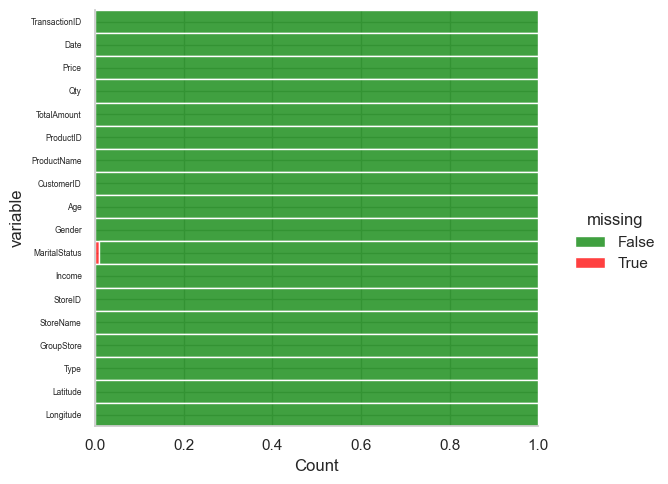

In [16]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)

**Observations:**
- Kolom `MaritalStatus` memiliki `44 nilai null / missing values`, persentase sebesar 0.87% dari jumlah data

### **Division by Type of Data**

In [17]:
df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,01/01/2022,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,17/07/2022,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,26/09/2022,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,08/01/2022,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,10/01/2022,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


In [18]:
cat_id_cols = ["TransactionID", "ProductID", "CustomerID", "StoreID"]
cat_cols = ["ProductName", "Gender", "MaritalStatus", 
            "StoreName", "GroupStore", "Type"]
            
num_cols = ["Price", "Qty", "TotalAmount", "Age", 
            "Income", "Latitude", "Longitude"]

timestamp = ["Date"]

In [19]:
df.columns

Index(['TransactionID', 'Date', 'Price', 'Qty', 'TotalAmount', 'ProductID',
       'ProductName', 'CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income',
       'StoreID', 'StoreName', 'GroupStore', 'Type', 'Latitude', 'Longitude'],
      dtype='object')

## **📌 Data Types Information**

In [20]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   Price          5020 non-null   int64  
 3   Qty            5020 non-null   int64  
 4   TotalAmount    5020 non-null   int64  
 5   ProductID      5020 non-null   object 
 6   ProductName    5020 non-null   object 
 7   CustomerID     5020 non-null   int64  
 8   Age            5020 non-null   int64  
 9   Gender         5020 non-null   int64  
 10  MaritalStatus  4976 non-null   object 
 11  Income         5020 non-null   float64
 12  StoreID        5020 non-null   int64  
 13  StoreName      5020 non-null   object 
 14  GroupStore     5020 non-null   object 
 15  Type           5020 non-null   object 
 16  Latitude       5020 non-null   float64
 17  Longitude      5020 no

**Change the Some column data type**

Untuk memudahkan dalam proses extraction date maupun part of, maka kolom date `object` diubah menjadi `datetime64`

In [21]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y', infer_datetime_format=True)

In [22]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   Date           5020 non-null   datetime64[ns]
 2   Price          5020 non-null   int64         
 3   Qty            5020 non-null   int64         
 4   TotalAmount    5020 non-null   int64         
 5   ProductID      5020 non-null   object        
 6   ProductName    5020 non-null   object        
 7   CustomerID     5020 non-null   int64         
 8   Age            5020 non-null   int64         
 9   Gender         5020 non-null   int64         
 10  MaritalStatus  4976 non-null   object        
 11  Income         5020 non-null   float64       
 12  StoreID        5020 non-null   int64         
 13  StoreName      5020 non-null   object        
 14  GroupStore     5020 non-null   object      

In [23]:
df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,2022-01-01,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,2022-07-17,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,2022-09-26,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,2022-01-08,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,2022-01-10,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


## **📌 Statistical Summary**

### **Numerical + Date Features**

In [24]:
print('The number of numerical features is {}'.format(len(num_cols)))

df[num_cols].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 7


,Price,Qty,TotalAmount,Age,Income,Latitude,Longitude
count,5020,5020,5020,5020,5020,5020,5020
mean,9684.801,3.645,32279.482,40.004,8.624,-2.942,109.601
std,4600.709,1.855,19675.462,12.835,6.518,4.323,8.358
min,3200,1,7500,0,0,-7.797,95.324
25%,4200,2,16000,30,4.220,-6.915,104.757
50%,9400,3,28200,39,7.720,-5.135,110.371
75%,15000,5,47000,51,10.780,0.534,114.590
max,18000,10,88000,72,71.300,5.548,128.191


### **Categorical Features**

In [25]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 6


In [26]:
dfc = df.copy()
cat = (cat_cols + cat_id_cols).copy()
for i in cat:
    dfc[i] = dfc[i].astype("category")
cat.insert(0, "Date")
dfc[cat].describe().transpose()

,count,unique,top,freq,first,last
Date,5020,365,2022-03-02 00:00:00,31,2022-01-01,2022-12-31
ProductName,5020,10,Thai Tea,814,NaT,NaT
Gender,5020,2,0,2746,NaT,NaT
MaritalStatus,4976,2,Married,3779,NaT,NaT
StoreName,5020,12,Lingga,738,NaT,NaT
GroupStore,5020,7,Prima,1085,NaT,NaT
Type,5020,2,General Trade,2851,NaT,NaT
TransactionID,5020,4908,TR71313,3,NaT,NaT
ProductID,5020,10,P5,814,NaT,NaT
CustomerID,5020,447,156,21,NaT,NaT


In [27]:
#cek unique value
dfc = df.copy()
dfc['MaritalStatus'] = dfc['MaritalStatus'].fillna(dfc['MaritalStatus'].mode()[0])
for x in dfc.columns :         
    unq = list(dfc[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== TransactionID =====
['TR11369', 'TR89318', 'TR9106', 'TR4331', 'TR6445', 'TR38909', 'TR36491', 'TR20045', 'TR12061', 'TR39272', '.....']

===== Date =====
[numpy.datetime64('2022-01-01T00:00:00.000000000'), numpy.datetime64('2022-07-17T00:00:00.000000000'), numpy.datetime64('2022-09-26T00:00:00.000000000'), numpy.datetime64('2022-01-08T00:00:00.000000000'), numpy.datetime64('2022-01-10T00:00:00.000000000'), numpy.datetime64('2022-03-04T00:00:00.000000000'), numpy.datetime64('2022-01-03T00:00:00.000000000'), numpy.datetime64('2022-01-20T00:00:00.000000000'), numpy.datetime64('2022-03-28T00:00:00.000000000'), numpy.datetime64('2022-12-21T00:00:00.000000000'), '.....']

===== Price =====
[7500, 10000, 3200, 15000, 4200, 8800, 16000, 12000, 9400, 18000, '.....']

===== Qty =====
[4, 1, 3, 5, 6, 2, 7, 10, 8, 9, '.....']

===== TotalAmount =====
[30000, 7500, 22500, 37500, 45000, 15000, 70000, 50000, 10000, 20000, '.....']

===== ProductID =====
['P3', 'P9', 'P2', 'P10', 'P5', 'P1', 'P

In [28]:
cat = cat_cols.copy()
cat.insert(0, "Date")
for i in cat:
    print(i)
    print(df[i].value_counts().iloc[:10])
    print()

Date
2022-03-02    31
2022-07-01    27
2022-03-03    27
2022-04-01    26
2022-01-15    25
2022-12-01    25
2022-12-24    24
2022-09-26    24
2022-05-19    24
2022-03-11    24
Name: Date, dtype: int64

ProductName
Thai Tea        814
Cheese Stick    620
Ginger Candy    530
Coffee Candy    522
Crackers        519
Yoghurt         488
Oat             485
Choco Bar       397
Potato Chip     390
Cashew          255
Name: ProductName, dtype: int64

Gender
0    2746
1    2274
Name: Gender, dtype: int64

MaritalStatus
Married    3779
Single     1197
Name: MaritalStatus, dtype: int64

StoreName
Lingga              738
Sinar Harapan       698
Buana               368
Prima Kota          367
Prima Kelapa Dua    364
Prestasi Utama      363
Bonafid             362
Harapan Baru        355
Buana Indah         355
Prima Tendean       354
Name: StoreName, dtype: int64

GroupStore
Prima           1085
Lingga           738
Buana            723
Prestasi         718
Gita             712
Harapan Baru     698


# **⚙ Data Understanding ⚙**

## **📌 Handling Duplicate Rows**

In [29]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [30]:
df.duplicated().sum()

0

In [31]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (5020, 18)
Data Frame Dimension After Duplicate Removal: (5020, 18)


In [32]:
df[df.duplicated(subset=["TransactionID", "CustomerID"], keep=False)].sort_values(by=list(df.columns.values)).head(6)

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


In [33]:
df.duplicated(subset=["TransactionID", "CustomerID"]).sum()

0

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [34]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
MaritalStatus,44,0.876494,object
TransactionID,0,0.000000,object
Date,0,0.000000,datetime64[ns]
Price,0,0.000000,int64
Qty,0,0.000000,int64
TotalAmount,0,0.000000,int64
ProductID,0,0.000000,object
ProductName,0,0.000000,object
CustomerID,0,0.000000,int64
Age,0,0.000000,int64


### **Imputation**

Imputation (Mode), karena Categorical

In [35]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Imputation using `fillna`

In [36]:
# mode = df['MaritalStatus'].mode()[0]
# df['MaritalStatus'].fillna(mode, inplace=True)
# df['MaritalStatus'].isna().sum()

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

Dikarenakan pada proses multivariate approach memerlukan semua feature bertipe numerical sehingga untuk data yang masih bertipe object/string dan date akan di drop pada data temp

In [37]:
df_ma = df.copy()

In [38]:
col_drop = timestamp+cat_id_cols+["Latitude", "Longitude"]
df_ma = df_ma.drop(col_drop, axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ["ProductName", "StoreName", "GroupStore", "Type"]:
    df_ma[i] = le.fit_transform(df_ma[i])
    print(le.classes_)
    
map_ms = {
    'Single' : 0,
    'Married' : 1
}

df_ma['MaritalStatus'] = df_ma['MaritalStatus'].map(map_ms)

['Cashew' 'Cheese Stick' 'Choco Bar' 'Coffee Candy' 'Crackers'
 'Ginger Candy' 'Oat' 'Potato Chip' 'Thai Tea' 'Yoghurt']
['Bonafid' 'Buana' 'Buana Indah' 'Gita Ginara' 'Harapan Baru' 'Lingga'
 'Prestasi Utama' 'Priangan' 'Prima Kelapa Dua' 'Prima Kota'
 'Prima Tendean' 'Sinar Harapan']
['Buana' 'Gita' 'Harapan Baru' 'Lingga' 'Prestasi' 'Priangan' 'Prima']
['General Trade' 'Modern Trade']


In [40]:
df_ma.head()

,Price,Qty,TotalAmount,ProductName,Age,Gender,MaritalStatus,Income,StoreName,GroupStore,Type
0,7500,4,30000,4,36,0,1,10.530,6,4,0
1,7500,1,7500,4,27,1,0,0.180,6,4,0
2,7500,4,30000,4,34,0,1,4.360,6,4,0
3,7500,3,22500,4,29,1,0,4.740,6,4,0
4,7500,4,30000,4,33,1,1,9.940,6,4,0


#### **Implementation Multivariate Approach**

**Two main methods we use here to impute missing values**

- `KNN Imputer` or K-Nearest Neighbor
- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `miceforest`

#### **Imputation using `KNNImputer`**

In [41]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

In [42]:
# from sklearn.impute import KNNImputer

# # Train
# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
# df["MaritalStatus"].unique()

In [43]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

In [44]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

In [45]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Train
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
# df["MaritalStatus"].unique()

In [46]:
# print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

In [47]:
print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Jumlah missing values Marital Status sebelum Imputation = 44


In [48]:
import miceforest as mf

df_ma_amp = mf.ampute_data(df_ma, perc=0.25,random_state=1991)

# Create kernel. 
kds = mf.ImputationKernel(
  data = df_ma,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["MaritalStatus"] = np.where(df_imputed["MaritalStatus"] > 0.5, "Married", "Single").copy()
df["MaritalStatus"].unique()

array(['Married', 'Single'], dtype=object)

In [49]:
print("Jumlah missing values Marital Status sebelum Imputation =", df["MaritalStatus"].isna().sum())

Jumlah missing values Marital Status sebelum Imputation = 0


### **📌 New DataFrame for K-Means Modeling** ###

In [50]:
df.head()

,TransactionID,Date,Price,Qty,TotalAmount,ProductID,ProductName,CustomerID,Age,Gender,MaritalStatus,Income,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,2022-01-01,7500,4,30000,P3,Crackers,328,36,0,Married,10.530,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
1,TR89318,2022-07-17,7500,1,7500,P3,Crackers,183,27,1,Single,0.180,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
2,TR9106,2022-09-26,7500,4,30000,P3,Crackers,123,34,0,Married,4.360,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
3,TR4331,2022-01-08,7500,3,22500,P3,Crackers,335,29,1,Single,4.740,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757
4,TR6445,2022-01-10,7500,4,30000,P3,Crackers,181,33,1,Married,9.940,12,Prestasi Utama,Prestasi,General Trade,-2.991,104.757


In [51]:
df_clustering = df.groupby('CustomerID').agg({'TransactionID' : 'count',
                                          'Qty' : 'sum',
                                          'TotalAmount' : 'sum'})
df_clustering.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


In [52]:
print("Shape of data :", df_clustering.shape)
print("Number of rows :", df_clustering.shape[0])
print("Number of columns :", df_clustering.shape[1])

Shape of data : (447, 3)
Number of rows : 447
Number of columns : 3


### **📌 Check Data Outlier** ###

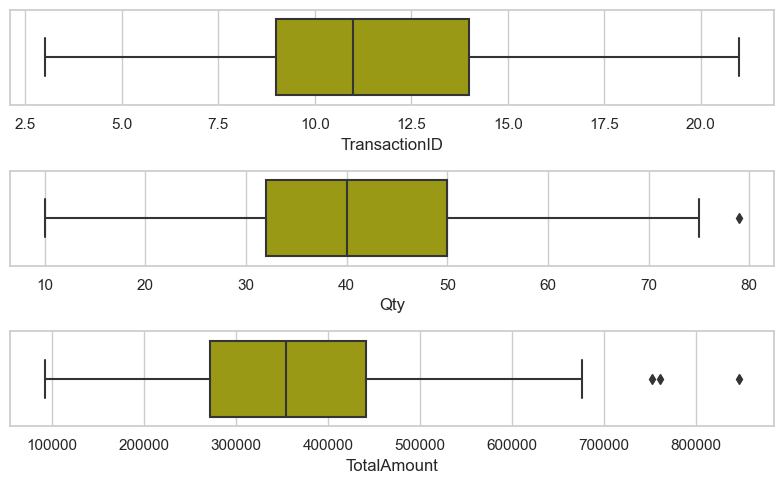

In [53]:
cols = ['TransactionID', 'Qty', 'TotalAmount']

plt.figure(figsize=(8, 5))
n = 3
for i in range(0, len(cols)):
    plt.subplot(n, math.ceil(len(cols)/n), i+1)
    sns.boxplot(x=df_clustering[cols[i]], color='#afaf00')
    plt.tight_layout()

**Observation:**

There is data outlier in `qty` and `totalamount`, but not too many and significant, therefore it does not need further processing

### **📌 Data Transformation** ###

In [54]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in cluster_df
df_clustering_std = scaler.fit_transform(df_clustering.values)

# Convert the standardized data back to a DataFrame
df_clustering_std = pd.DataFrame(df_clustering_std, columns=df_clustering.columns)

# check the cluster_df_std data
df_clustering_std.head()

,TransactionID,Qty,TotalAmount
0,1.780,1.497,2.095
1,0.546,1.261,0.239
2,1.163,1.183,0.672
3,-0.380,0.398,-0.482
4,-1.305,-1.093,-0.754


## **💡 Clustering Model with K-Means Model** ##

### **📌 Elbow Method** ###

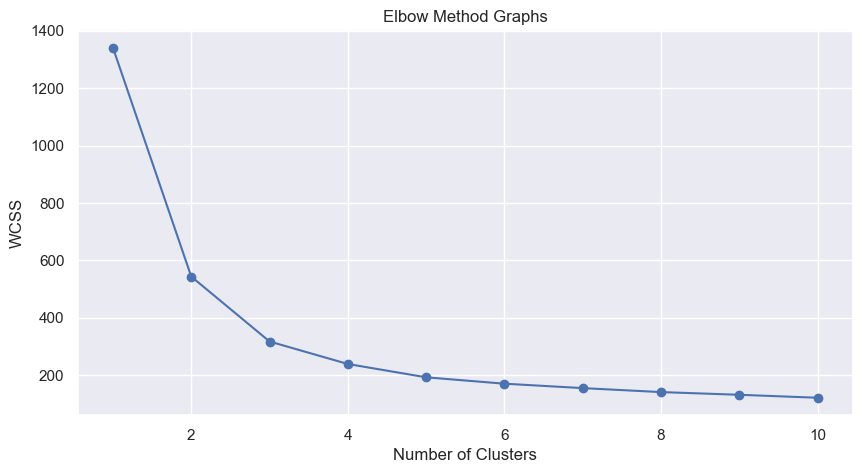

In [55]:
# plot the elbow method to get best number of clusters
wcss = [] # wcss is Within Cluster of Sum Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(df_clustering_std.values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Observation:**

The result of Elbow Method above shows that `the best suit number of cluster is 3 clusters`

### **📌 K-Means Model Segmentation** ###

In [56]:
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans_3.fit_predict(df_clustering_std)
df_clustering['cluster'] = clusters

df_clustering.head()

,TransactionID,Qty,TotalAmount,cluster
CustomerID,,,,
1,17,60,623300,1
2,13,57,392300,1
3,15,56,446200,1
4,10,46,302500,2
5,7,27,268600,0


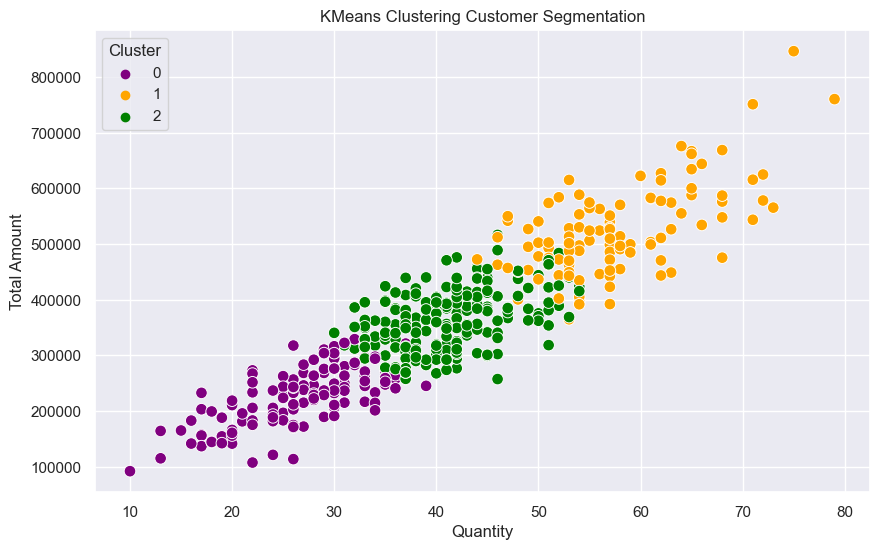

In [57]:
df_clustering['cluster'] = df_clustering['cluster'].astype('category')
colors=['purple', 'orange', 'green']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='TotalAmount', data=df_clustering, hue='cluster', palette=colors, s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

### **📌 K-Means Model Segmentation using PCA** ###

In [58]:
# Kmeans n_cluster = 3
#Clustering Kmeans
kmeans_pca = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans_pca.fit(df_clustering_std)

df_nclus3 = pd.DataFrame(data=df_clustering_std, columns=df_clustering.columns)
df_nclus3['cluster'] = kmeans_pca.labels_
df_nclus3.head()

,TransactionID,Qty,TotalAmount,cluster
0,1.780,1.497,2.095,1
1,0.546,1.261,0.239,1
2,1.163,1.183,0.672,1
3,-0.380,0.398,-0.482,2
4,-1.305,-1.093,-0.754,0


In [59]:
#PCA
clust_pca = PCA(n_components=2).fit_transform(df_clustering_std)
df_clust_pca = pd.DataFrame(data=clust_pca,columns=['pc1','pc2'])
df_clust_pca['cluster'] = df_nclus3['cluster']
df_clust_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
pc1,447,0.000,1.662,-4.121,-1.133,-0.124,1.081,5.351
pc2,447,-0.000,0.386,-1.280,-0.242,-0.004,0.246,1.349
cluster,447,1.150,0.856,0,0,1,2,2


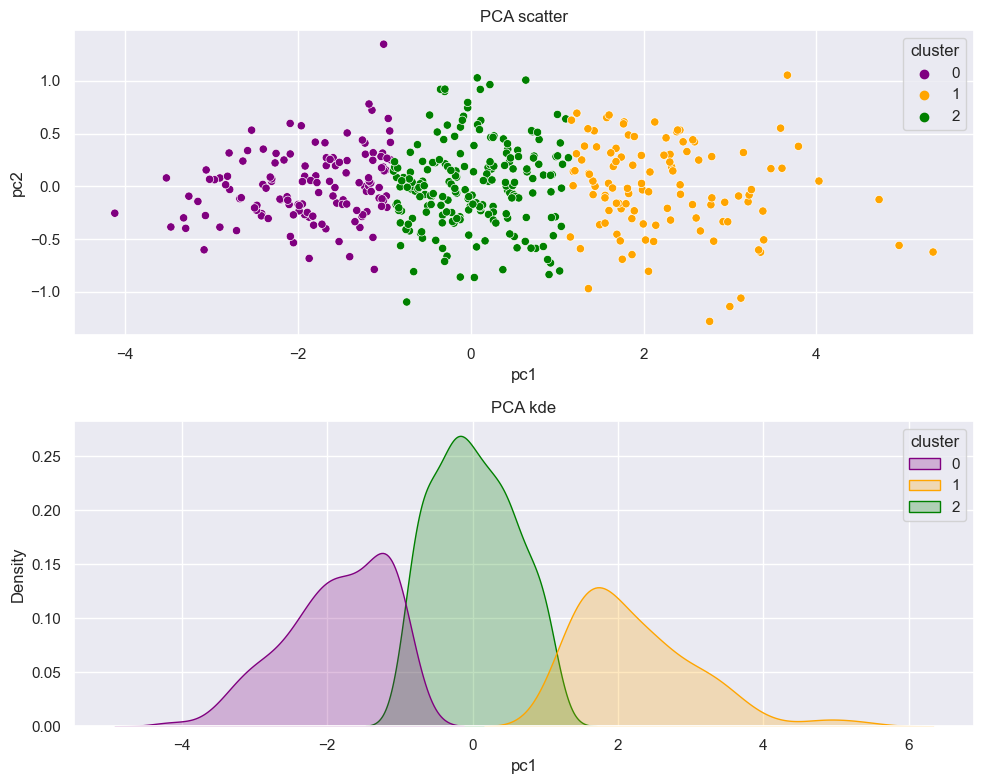

In [60]:
#PCA plot
colors=['purple', 'orange', 'green']
fig,ax = plt.subplots(2,1,figsize=(10,8))
sns.scatterplot(data=df_clust_pca,x='pc1',y='pc2',hue='cluster',palette=colors,ax=ax[0])
ax[0].set_title('PCA scatter')
sns.kdeplot(data=df_clust_pca,x='pc1',hue='cluster',palette=colors,fill=True,ax=ax[1])
ax[1].set_title('PCA kde')
plt.tight_layout()
plt.show()

### **📌 Silhoutte Score** ###

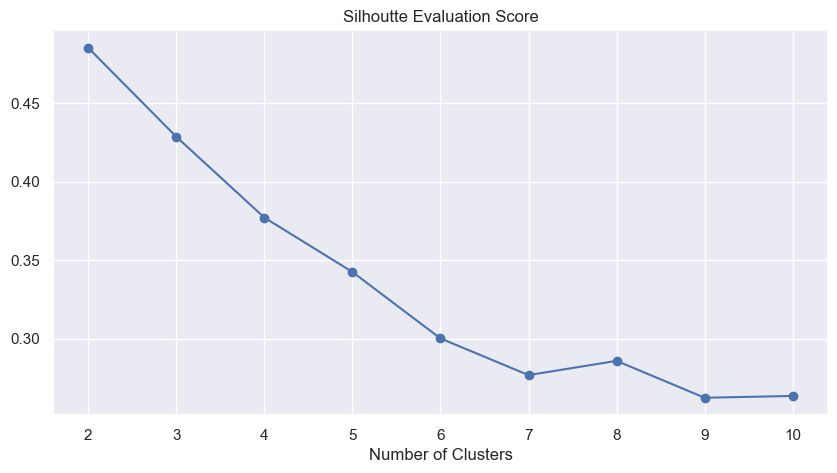

In [61]:
from sklearn.metrics import silhouette_score

n_clust = list(range(2,11))
silhouette_avg = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i).fit(df_clustering_std)
    preds = kmeans.predict(df_clustering_std)
    score_euclidean = silhouette_score(df_clustering_std, preds, metric='euclidean')
    silhouette_avg.append(score_euclidean)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Silhoutte Evaluation Score')
plt.xlabel('Number of Clusters')
plt.show()

### **📌 RFM Analysis** ###

In [62]:
df_clustering['cluster'] = kmeans_3.labels_

df['recency'] = (pd.to_datetime('2023-01-01') - df['Date']).dt.days.astype('int')
df_recency = df.groupby('CustomerID').agg({'recency':'min'})

df_rfm = df_clustering.copy()
df_rfm['recency'] = df_recency['recency']

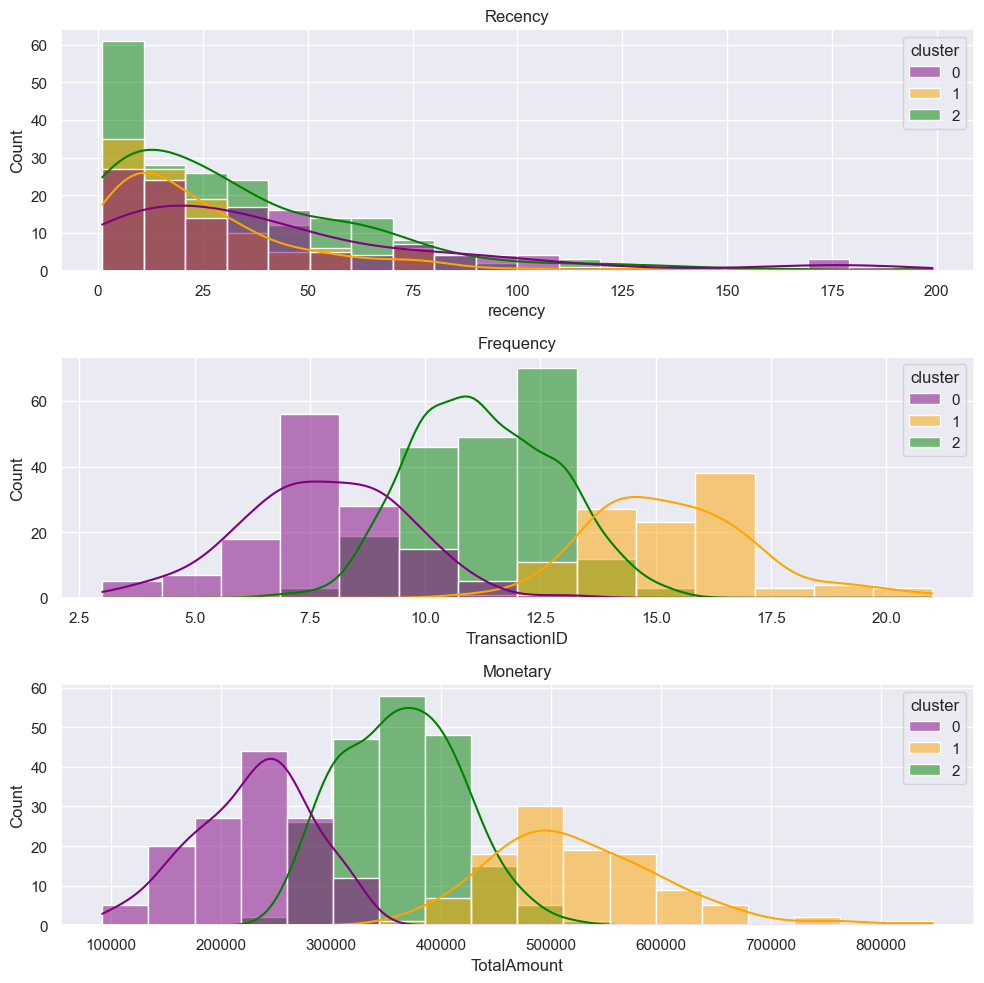

In [63]:
colors=['purple', 'orange', 'green']
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.histplot(data=df_rfm,x='recency',hue='cluster',palette=colors,ax=ax[0],kde=True)
ax[0].set_title('Recency')
sns.histplot(data=df_rfm,x='TransactionID',hue='cluster',palette=colors,ax=ax[1],kde=True)
ax[1].set_title('Frequency')
sns.histplot(data=df_rfm,x='TotalAmount',hue='cluster',palette=colors,ax=ax[2],kde=True)
ax[2].set_title('Monetary')

plt.tight_layout()
plt.show()

In [64]:
display(df_rfm.groupby('cluster').agg(['mean','median', 'max', 'min']))

TransactionID                   Qty                TotalAmount         \
                 mean median max min   mean median max min        mean median   
cluster                                                                         
0               7.785      8  13   3 26.933     28  39  10  229388.889 235300   
1              15.364     15  21  11 57.636     57  79  44  524504.545 510550   
2              11.282     11  15   7 41.188     41  54  30  363267.327 362400   

                        recency                  
            max     min    mean median  max min  
cluster                                          
0        329300   92100  42.978     31  191   1  
1        846700  365000  24.336     16  129   2  
2        516600  257600  33.713     25  199   1

**Observation:**

Based on the results of the RFM analysis above, customer characteristics based on each cluster:

- **Clusters 0:**
    - Customers in this cluster have `the lowest recency with an average of around 24 days`. Based on this, it can be concluded that customers in cluster 0 tend to shop more often because customers are able to shop again in less than 1 month.
    - The frequency of purchases made by customers in this cluster tends to be more frequent and can be said to be `the most frequent of all clusters`. This can be seen from the number of transactions made by customers with an `average of 15 times`
    - `Total Amount spent on shopping in this cluster is among the highest` with an average `total amount of around $524,500`.

Based on this information, customers in Cluster 0 can be summed up as **Priority Customers (Tier 1)**

**Business Recommendation for Cluster 0 (Priority Customers)**

    Customers in this cluster have the lowest recency, very active for shopping and spending very much money. So we can give recommendation:
    - Give Voucher/Rewards
    - Give Promo Bundling/Special Offer Mix & Match bundling strategy  
    

- **Cluster 1:**
    - Customers in Cluster 1 have an `average recency/last shopping time of around 33 days`. Based on this, it can be said that customers in this cluster have a `slightly longer recency` and will return to shopping again after more than 1 month.
    - The frequency of purchases made by customers in this cluster can be said to be `quite frequent`, as can be seen from the `total transactions with an average shopping frequency of 11 times`.
    - Total Amount spent on shopping in this cluster can be said to be `quite a lot` with an `average total amount of around $363,000`.
    
Based on this information, customers in Cluster 1 can be summed up as **Potential Customers (Tier 2)**

**Business Recommendation for Cluster 1 (Potential Customers)**

    Customers in this cluster have slightly longer recency, quite active for shopping and spending quite much money. So we can give recommendation:
        - Give Discount/Flash Sale
        - Promo Bundling/Special Offer Buy 1 Get 1 strategy
        

- **Cluster 2:**
    - Customers in Cluster 2 have an `average recency/last shopping time of around 43 days`. Based on this, it can be said that customers in this cluster have `the longest recency` and will return to shopping again after more than 1.5 months.
    - The frequency of purchases made by customers in this cluster can be said to be `the least frequent` as seen from the `total transactions with an average shopping frequency of 8 times`.
    - Total Amount spent on shopping in this cluster can be said to be `the least spent` with an `average total amount of around $229,300`.
    
Based on this information, customers in Cluster 1 can be summed up as **Need Attention Customers (Tier 3)**

**Business Recommendation for Cluster 2 (Need Attention Customers)**

    Customers in this cluster have the longest recency, quite active for shopping and spending quite much money. So we can give recommendation:
        - Give Discount/Flash Sale
        - Promo Bundling/Special Offer Buy 1 Get 1 and Limited Edition Bundling (giving urgency sense to purchase)

## **💡 Business Insight** ##

### **📌 Statistics Info of `transactionid` `qty` `totalamount`** ###

In [65]:
display(df_clustering.groupby('cluster').agg(['mean','median', 'max', 'min']))

TransactionID                   Qty                TotalAmount         \
                 mean median max min   mean median max min        mean median   
cluster                                                                         
0               7.785      8  13   3 26.933     28  39  10  229388.889 235300   
1              15.364     15  21  11 57.636     57  79  44  524504.545 510550   
2              11.282     11  15   7 41.188     41  54  30  363267.327 362400   

                         
            max     min  
cluster                  
0        329300   92100  
1        846700  365000  
2        516600  257600

### **📌 Total Customer in Each Cluster** ###

In [66]:
df_total_customer = df_clustering.groupby('cluster').agg({'Qty':'count'}).reset_index()
df_total_customer = df_total_customer.rename(columns={'Qty':'total_customers'})
df_total_customer['sum_customers'] = df_total_customer['total_customers'].sum()
df_total_customer['percentage'] = round((df_total_customer['total_customers']/df_total_customer['sum_customers'])*100, 2)
df_total_customer

,cluster,total_customers,sum_customers,percentage
0,0,135,447,30.200
1,1,110,447,24.610
2,2,202,447,45.190


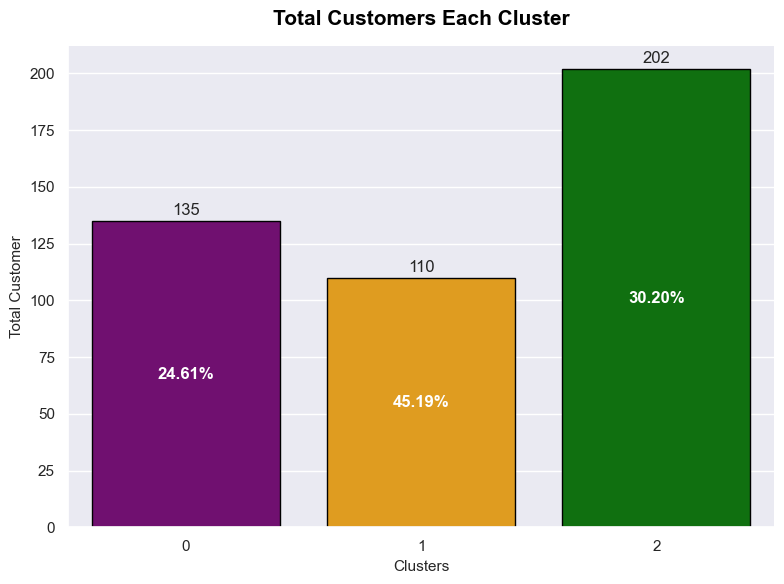

In [67]:
colors = ['purple', 'orange', 'green']
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Total Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='cluster', y='total_customers', data=df_total_customer, edgecolor='black', palette=colors)

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['24.61%', '45.19%', '30.20%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

**Observation:**

Based on barplot above, it shows that **Cluster 1** has the highest Total Customer with percentage of **45.19%**, then followed by **Cluster 2** has Total Customer with percentage of **30.20%** and **Cluster 0** has Total Customer with percentage of **24.61%**.

### **📌 Customer Segmentation based on `transactionid` `qty` `totalamount`** ###

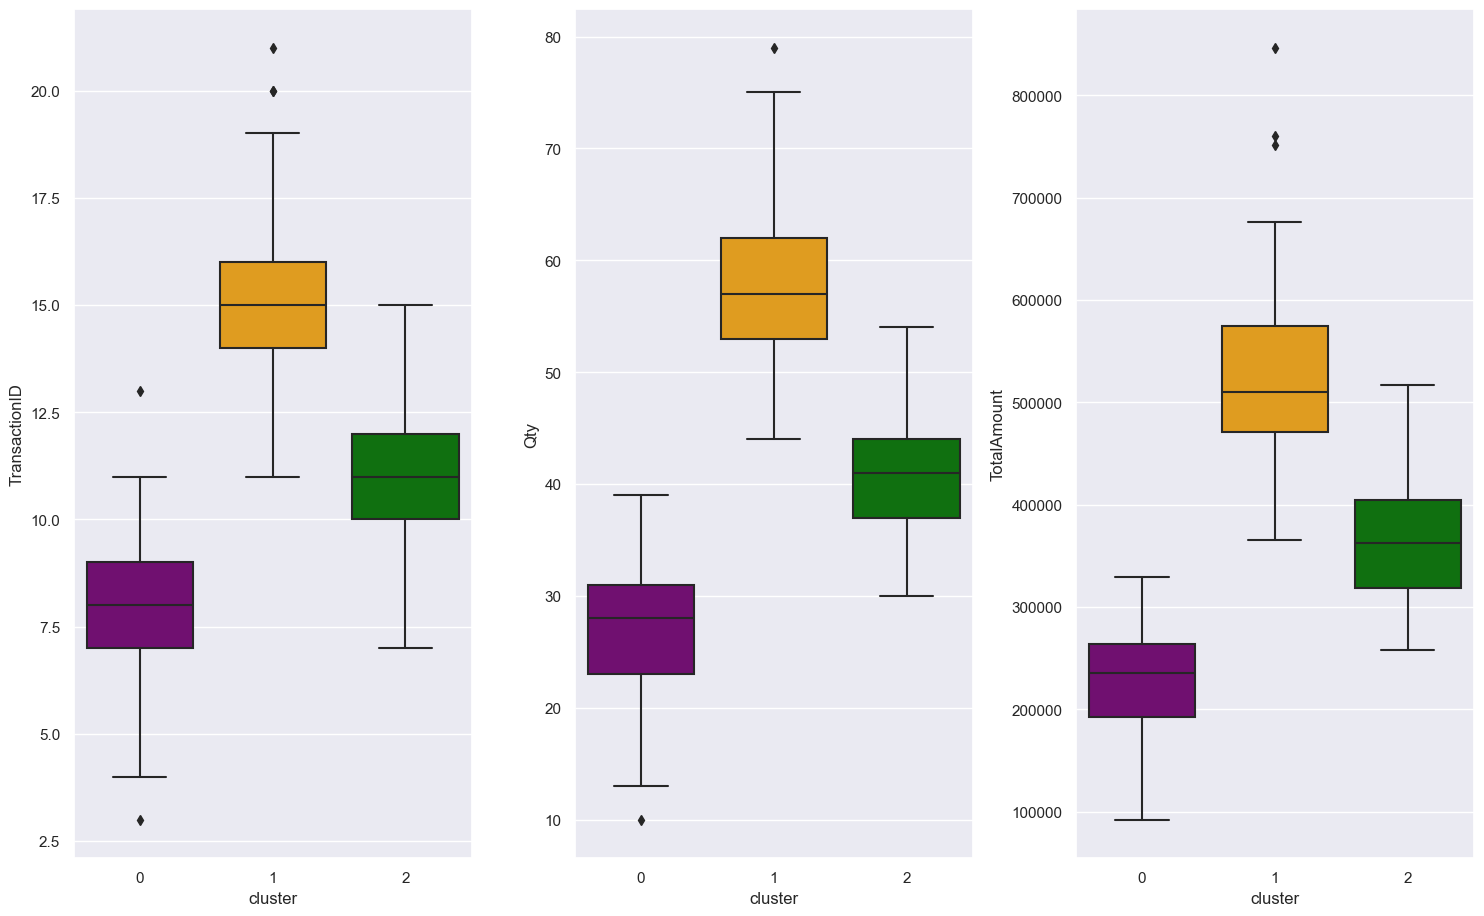

In [68]:
df_clust = df_clustering.copy()
clust = df_clust.columns.drop('cluster')

colors = ['purple', 'orange', 'green']
plt.figure(figsize= (15, 18))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_clustering['cluster'], y=df_clustering[clust[i]], palette=colors)
    plt.tight_layout()

**Observation:**

Based on the Boxplot above, the information that can be concluded is:

### **📌 Age VS Customer Segmentation** ###

Text(0.5, 1.0, 'Age VS Customer Segmentation')

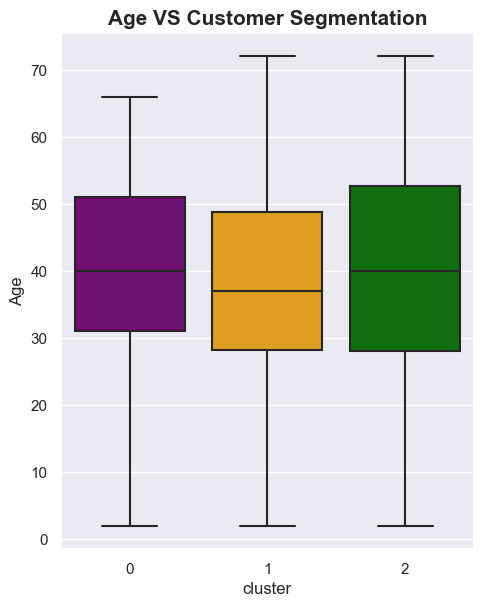

In [69]:
colors = ['purple', 'orange', 'green']
plt.figure(figsize= (5, 6))
sns.boxplot(x=df_clustering['cluster'], y=df['Age'], palette=colors)
plt.tight_layout()

plt.title("Age VS Customer Segmentation", fontsize=15, fontweight="bold")

### **📌 Income VS Customer Segmentation** ###

Text(0.5, 1.0, 'Income VS Customer Segmentation')

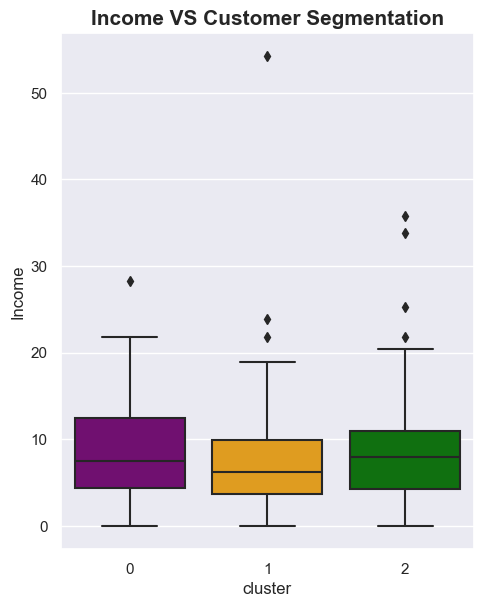

In [70]:
colors = ['purple', 'orange', 'green']
plt.figure(figsize= (5, 6))
sns.boxplot(x=df_clustering['cluster'], y=df['Income'], palette=colors)
plt.tight_layout()

plt.title("Income VS Customer Segmentation", fontsize=15, fontweight="bold")